In [1]:
import numpy as np
import pandas as pd
import pickle
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import RidgeClassifier

plt.style.use('seaborn-white')
pd.set_option("display.max_rows", 50, "float_format", lambda v: "%.2f" % v )
pd.set_option('display.max_columns', 50)
# suppress the chained indexing warnings entirely
pd.set_option('mode.chained_assignment',None)

# Fixing random state for reproducibility 
seed_value = 42
np.random.seed(seed_value)

%matplotlib inline

In [ ]:
#!pip install missingno

### Load training data

In [2]:
data = pd.read_csv('D:/.jupyter/Machine_Predicted_Lithology/train.csv', sep=';', memory_map=True)

In [3]:
data.sample(10)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
30423,15/9-15,2343.30,436806.47,6463010.50,-2318.01,ROGALAND GP.,Lista Fm.,14.88,0.77,0.77,0.66,2.21,66.81,nan,0.40,3.03,121.58,88.21,12.25,12.76,nan,2.63,0.12,0.14,nan,nan,0.57,65000,1.00
1073159,35/3-7 S,3582.47,543919.75,6856653.50,-3477.86,CROMER KNOLL GP.,Roedby Fm.,8.65,nan,5.60,4.99,2.65,93.30,nan,0.17,5.03,63.60,nan,8.50,10.56,150.21,nan,-0.01,nan,6.63,10.41,nan,65000,1.00
436368,25/9-1,734.81,483545.34,6590313.00,-709.76,NORDLAND GP.,Utsira Fm.,nan,nan,nan,1.00,nan,55.92,nan,nan,nan,nan,nan,17.50,109.27,nan,nan,nan,nan,nan,nan,nan,65030,1.00
290688,25/3-1,1075.97,487291.25,6643945.00,-1053.94,HORDALAND GP.,NaN,17.65,nan,0.87,1.23,2.04,41.80,nan,nan,0.77,148.78,21.60,17.50,7.97,nan,0.22,0.05,0.96,nan,nan,nan,30000,1.00
1118085,35/9-10 S,3580.06,537897.75,6791142.50,-3069.18,BAAT GP.,Rannoch Fm.,8.57,nan,7.63,8.07,2.57,126.82,nan,0.26,3.62,77.51,nan,8.50,31.77,140.67,nan,0.04,nan,nan,nan,nan,65000,1.00
564809,31/2-7,543.91,524586.50,6747128.50,-518.90,NORDLAND GP.,NaN,17.80,nan,2.29,2.98,2.23,40.29,nan,0.42,nan,142.21,49.07,nan,nan,nan,nan,0.01,nan,nan,nan,nan,65000,1.00
745628,33/9-17,2600.58,438440.25,6814142.50,-2573.35,SHETLAND GP.,Kyrre Fm.,8.53,1.44,1.39,1.33,2.52,80.00,nan,0.34,4.40,109.65,87.75,8.50,nan,nan,nan,-0.00,nan,nan,6.81,2.04,65000,1.00
531364,30/6-5,2325.03,497435.72,6728314.00,-2299.98,SHETLAND GP.,Lista Fm.,14.65,1.96,1.85,1.67,2.41,27.03,nan,0.28,nan,90.84,73.18,nan,nan,nan,nan,0.00,nan,nan,nan,2.09,70000,1.00
936673,34/8-1,2787.79,469565.44,6803862.00,-2746.41,BAAT GP.,Tarbert Fm.,8.00,1.49,54.16,36.71,2.19,72.84,nan,0.25,50.90,117.96,68.47,8.38,nan,nan,nan,-0.07,nan,nan,nan,1.82,30000,1.00
144292,16/4-1,1058.20,449949.31,6500257.00,-1033.07,HORDALAND GP.,Utsira Fm.,16.72,1.20,1.20,1.34,1.85,90.45,nan,0.51,nan,148.09,140.19,14.75,1.83,nan,1.97,-0.00,0.14,nan,nan,nan,65000,1.00


In [4]:
data.GROUP.unique()

array(['NORDLAND GP.', 'HORDALAND GP.', 'ROGALAND GP.', 'SHETLAND GP.',
       'CROMER KNOLL GP.', 'VIKING GP.', 'VESTLAND GP.', 'ZECHSTEIN GP.',
       'HEGRE GP.', 'ROTLIEGENDES GP.', 'TYNE GP.', 'BOKNFJORD GP.',
       'DUNLIN GP.', 'BAAT GP.', nan], dtype=object)

### Inspecting available logs and interpretations

The data contains the metadata columns
* WELL: well name
* DEPTH_MD: measured depth
* X_LOC: UTM X coordinate 
* Y_LOC: UTM Y coordinate
* Z_LOC: DEPTH
* GROUP: NPD lithostratigraphy group
* FORMATION: NPD lithostratgraphy formation

The data contains the well log curves. For example the following:
* BS: Bit Size
* CALI: Caliper
* RDEP: Deep Resistivity
* RHOB: Bulk Density
* GR: Raw gamma data
* SGR: Spectral Gamma Ray
* RMED: Medium Resistivity
* ROP: Rate of Penetration
* NPHI: Neutron Porosity
* PEF: Photoelectric Absorption Factor
* RSHA: Shallow Resistivity
* DTS: Sonic (Sheer Slowness)
* DTC: Sonic (Compressional Slowness)

See contest page for full list.

as well as the interpretation

* FORCE_2020_LITHOFACIES_LITHOLOGY: lithology class label
* FORCE_2020_LITHOFACIES_CONFIDENCE: confidence in lithology interpretation (1: high, 2: medium, 3: low)

There is a total of 83 wells in the training dataset. The `WELL` column is included so the data can be separated per well. This will be necessary for any "windowed" approaches where we use non-local information in the ML features. 

In [5]:
wells = data['WELL'].unique()
print('No of wells: %s' % len(wells))
wells

No of wells: 98


array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

### The LITHOLOGY column

The LITHOLOGY column contains the interpretation. Each number corresponds to a lithology class, given by the following list:

In [6]:
lithology_keys = {} # initialize dictionary
litho=['Sandstone', 'Shale', 'SandyShale', 'Limestone', 'Chalk', 'Dolomite', 
       'Marl', 'Anhydrite', 'Halite', 'Coal', 'Basement', 'Tuff']
col = np.sort(data['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique())
for index, name in enumerate(col):
    lithology_keys[name] = litho[index]
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}
lithology_keys

{30000: 'Sandstone',
 65030: 'Sandstone/Shale',
 65000: 'Shale',
 80000: 'Marl',
 74000: 'Dolomite',
 70000: 'Limestone',
 70032: 'Chalk',
 88000: 'Halite',
 86000: 'Anhydrite',
 99000: 'Tuff',
 90000: 'Coal',
 93000: 'Basement'}

Lithologies are not equally likely. This is reflected in this dataset.

In [ ]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

In [ ]:
counts = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]
for item in counts.iteritems():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(len(names)), height=percentage)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)')

### Missing logs

**Notice that some of the curves are NaN. This is an imporant aspect of this dataset and of this competition.** The only log columns that are **guaranteed** to be present are WELL, DEPT, and GR. All other logs can (and will) be missing from some parts of the dataset.

In [ ]:
dftype = pd.DataFrame(data.dtypes, columns=['pd_type'])
dftype['n_unique'] = data.nunique()
dftype['nan_bool'] = data.isna().any()
dftype['n_nan'] = data.isna().sum()
dftype

The following plot shows how large a percentage of training data wells contain at least some depth interval with the given logs. As you can see a couple of logs like RT and DTS are present in less than half of the training wells. **Remember, the test data will have a similar distribution of available logs**

In [ ]:
occurences = np.zeros(25)
for well in wells:
    occurences += data[data['WELL'] == well].isna().all().astype(int).values[2:-2]
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(occurences.shape[0]), height=(data.WELL.unique().shape[0]-occurences)/data.WELL.unique().shape[0]*100.0)
ax.set_xticklabels(data.columns[2:-2], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_ylabel('Well presence (\%)')

#### Look at some log curves for a couple of wells

In [ ]:
well_data = data[data['WELL'] == wells[0]]
fig, axs = plt.subplots(1, len(well_data.columns)-9, figsize=(14, 10), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                     'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                    'X_LOC', 'Y_LOC', 'Z_LOC'])):
    axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
    axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0])

In [ ]:
well_data = data[data['WELL'] == wells[57]]
fig, axs = plt.subplots(1, len(well_data.columns)-9, figsize=(14, 10), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                     'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                    'X_LOC', 'Y_LOC', 'Z_LOC'])):
    axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
    axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0])

### Preparing data for training

In [7]:
X_all = data.drop(columns=['WELL', 'X_LOC', 'Y_LOC', 'Z_LOC', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 
                           'FORCE_2020_LITHOFACIES_CONFIDENCE'])

In [ ]:
# Visualize missing values as a matrix
import missingno as msno
msno.matrix(X_all, color=(0., 0., 0.45))   
fig = plt.gcf()
fig.set_size_inches(20, 25)

#### To explore in more depth the data completion, below I am also adding below missingno 's dendrogram plot.

As explained in the library's documentation, The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

Interpreting the dendrogram in a top-down fashion, as suggested in the library documentation, my first thoguths are that this may suggest trying to predict missing values in a sequential fashion rather than for all logs at once. For example, looking at the largest cluster on the left, and starting from top right, I am thinking of testing use of GR to first predict missing values in RDEP, then both to predict missing values in RMED, then DTC. Then add CALI and use all logs completed so far to predict RHOB, and so on

In [ ]:
msno.dendrogram(X_all.drop(columns=['DEPTH_MD', 'GROUP', 'FORMATION']))

In [8]:
X_all.columns

Index(['DEPTH_MD', 'GROUP', 'FORMATION', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS',
       'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'],
      dtype='object')

In [10]:
# Some parameters
feature_names = ['CALI', 'GR', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'NPHI', 'PEF', 'DTC', 'SP', 'BS']#, 'ROP'
facies_names = lithology_keys.values()
facies_colors = ['darkorange', '#228B22', 'grey', 'cyan', 'gold', 'lightseagreen', 
                 'lawngreen', 'lightblue', 'tan', '#FF4500', '#000000', 'magenta']
#
#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_names):
    facies_color_map[label] = facies_colors[ind]

In [42]:
X=X_all[feature_names]
#take out rows with negative NPHI and RMED values 
#neg_idx=np.concatenate((well[X.NPHI<0].index, well[X.RMED<0].index), axis=None)
#X = X[~X.index.isin(neg_idx)]
#convert rows with negative RMED values to np.nan
neg_idx=X[X.RMED<0].index
X.RMED[X.index.isin(neg_idx)]=np.nan
neg_idx=X[X.GR>200].index
X.GR[X.index.isin(neg_idx)]=np.nan
#convert all restivity logs to logarithmic scale
#X['RSHA'] = np.log10(X['RSHA'])
#X['RMED'] = np.log10(X['RMED'])
#X['RDEP'] = np.log10(X['RDEP'])

X.describe()#isna().sum()

,CALI,GR,RSHA,RMED,RDEP,RHOB,NPHI,PEF,DTC,SP,BS
count,1082634.00,1164084.00,630650.00,1131511.00,1159496.00,1009242.00,765409.00,671692.00,1089648.00,864247.00,682657.00
mean,13.19,69.94,10.69,4.99,10.69,2.28,0.33,6.32,113.36,60.03,11.93
std,3.80,31.32,100.64,54.67,113.95,0.25,0.13,10.96,29.99,76.57,3.33
min,2.34,0.11,0.00,0.04,0.03,0.72,-0.04,0.10,7.42,-999.00,6.00
25%,9.43,47.51,0.85,0.91,0.91,2.09,0.24,3.41,87.83,32.40,8.50
50%,12.56,68.13,1.40,1.44,1.44,2.32,0.33,4.31,109.59,55.39,12.25
75%,16.71,88.64,3.10,2.68,2.56,2.49,0.42,5.97,140.77,83.39,12.25
max,28.28,200.00,2193.90,1988.62,1999.89,3.46,1.00,383.13,320.48,526.55,26.00


#### We should convert lithology labels to numbers 0-11 before training

In [12]:
Y = data['FORCE_2020_LITHOFACIES_LITHOLOGY']
lithology_numbers = {} # initialize dictionary
lithology_numbers = {30000: 0,
                     65030: 1,
                     65000: 2,
                     80000: 3,
                     74000: 4,
                     70000: 5,
                     70032: 6,
                     88000: 7,
                     86000: 8,
                     99000: 9,
                     90000: 10,
                     93000: 11}
display(lithology_keys)
Y = Y.map(lithology_numbers)
Y.unique()

{30000: 'Sandstone',
 65030: 'Sandstone/Shale',
 65000: 'Shale',
 80000: 'Marl',
 74000: 'Dolomite',
 70000: 'Limestone',
 70032: 'Chalk',
 88000: 'Halite',
 86000: 'Anhydrite',
 99000: 'Tuff',
 90000: 'Coal',
 93000: 'Basement'}

array([ 2,  0,  1,  5,  9,  3,  8,  4,  6, 10,  7, 11], dtype=int64)

In [43]:
# Store well labels and depths
well = data['WELL']
depth = data['DEPTH_MD']
Strat = data['GROUP']
Formation = data['FORMATION']
data_weights=data['FORCE_2020_LITHOFACIES_CONFIDENCE']

# Sort data according to depth for each well
Y_sort = DataFrame([])
for w_idx, w in enumerate(np.unique(well)):
    X_well = X[well == w]
    Y_well = Y[well == w]
    X[well == w] = X_well.loc[depth[well == w].sort_values().index.values]
    depth[well == w] = np.sort(depth[well == w])
    
data_weights=data_weights.reindex(X.index)
Y=Y.reindex(X.index)
Strat=Strat.reindex(X.index)

In [14]:
#impute missing lithology confidence
rc = RidgeClassifier(tol=1e-2, solver="sag")
x = Y[data_weights.notnull()].to_numpy().reshape(-1, 1)
y = data_weights[data_weights.notnull()].to_numpy().ravel()
rc.fit(x,y)
data_weights[data_weights.isnull()]=rc.predict(Y[data_weights.isnull()].to_numpy().reshape(-1, 1))
#data_weights = 3/data_weights

In [15]:
#impute missing stratigraph
from sklearn.preprocessing import LabelEncoder
labeler = LabelEncoder()

Strata = Series(labeler.fit_transform(Strat.astype(str)), index=Strat.index)
Strata=Strata.where(Strat.notnull(), Strat, axis=0)
x = Y[Strata.notnull()].to_numpy().reshape(-1, 1)
y = Strata[Strata.notnull()].to_numpy().ravel().astype('int')
rc.fit(x,y)
Strata[Strata.isnull()]=rc.predict(Y[Strata.isnull()].to_numpy().reshape(-1, 1))
Strata=Series(Strata, index=Strat.index).astype(int)
Strat=Series(labeler.inverse_transform(Strata.values.ravel()), index=Strat.index)
np.unique(Strat)

array(['BAAT GP.', 'BOKNFJORD GP.', 'CROMER KNOLL GP.', 'DUNLIN GP.',
       'HEGRE GP.', 'HORDALAND GP.', 'NORDLAND GP.', 'ROGALAND GP.',
       'ROTLIEGENDES GP.', 'SHETLAND GP.', 'TYNE GP.', 'VESTLAND GP.',
       'VIKING GP.', 'ZECHSTEIN GP.'], dtype=object)

##### As an approach, we replace nan values by modeling each feature with missing values as a function of other features in a round-robin fashion

In [16]:
from scipy.ndimage import median_filter
from scipy.signal import medfilt

#%% Remove noise from the data
def apply_filter(df):
    df = df.apply(lambda x: median_filter(x,size=30,mode='nearest'))
    return df

def apply_filternp(df):
    for i in range(df.shape[1]):
        df[i]=median_filter(df[i],size=5,mode='nearest')
    return df

def apply_filter_imp(df):
    df = df.apply(lambda x: median_filter(x,size=50,mode='nearest'))
    return df

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [44]:
X_imp=X.fillna(method='ffill').fillna(method='bfill')
X_imp.isna().sum()#[well == w]

CALI    0
GR      0
RSHA    0
RMED    0
RDEP    0
RHOB    0
NPHI    0
PEF     0
DTC     0
SP      0
BS      0
dtype: int64

In [ ]:
imp = IterativeImputer(random_state=seed_value, missing_values=np.nan, sample_posterior=True)
X_dend = DataFrame(imp.fit_transform(apply_filter(X)), index=X.index, columns=X.columns)
X_imp_ = apply_filter(DataFrame(imp.fit_transform(X), index=X.index, columns=X.columns))
X_imp=X.where(X.notnull(), X_imp_, axis=0)

In [ ]:
X_imp['CALIBS']=X_imp['CALI']-X_imp['BS']
X_imp.describe()

In [ ]:
krr = KernelRidge(kernel='laplacian')
X_krrimp = X
print('=========RDEP================')
print('.' * len(np.unique(well[X_krrimp.RDEP.isnull()])))
for w_idx, w in enumerate(np.unique(well[X_krrimp.RDEP.isnull()])):
    df = X_krrimp[well == w].copy()
    df_NotNaN = df[df.RDEP.notnull()]
    if df.RDEP.isna().sum().max()<df.shape[0]:
        x = apply_filter(df_NotNaN['GR']).to_numpy().reshape(-1, 1)
        y = df_NotNaN['RDEP'].to_numpy().reshape(-1, 1)
        krr.fit(x, y)
        xpred = df.loc[df['RDEP'].isnull(), :]['GR']
        xpred = apply_filter(xpred).to_numpy().reshape(-1, 1)
        df.RDEP[df['RDEP'].isnull()] = krr.predict(xpred).flatten()
        X_krrimp['RDEP'][well == w]=apply_filter(df['RDEP'])
    print('!', end='')
      
print('\n=========RMED================')
print('.' * len(np.unique(well[X_krrimp.RMED.isnull()])))
for w_idx, w in enumerate(np.unique(well[X_krrimp.RMED.isnull()])):
    df = X_krrimp[well == w].copy()
    df_NotNa = df[df.RMED.notnull()]
    if df.RMED.isna().sum().max()<df.shape[0]:
        x = apply_filter(df_NotNa[['GR', 'RDEP']]).to_numpy()
        y = df_NotNa['RMED'].to_numpy().reshape(-1, 1)
        krr.fit(x, y)
        xpred = df.loc[df['RMED'].isnull(), :][['GR', 'RDEP']]
        xpred = apply_filter(xpred).to_numpy()
        df.RMED[df['RMED'].isnull()] = krr.predict(xpred).flatten()
        X_krrimp['RMED'][well == w]=apply_filter(df['RMED'])
    print('!', end='')

print('\n=========DTC================')
print('.' * len(np.unique(well[X_krrimp.DTC.isnull()])))
for w_idx, w in enumerate(np.unique(well[X_krrimp.DTC.isnull()])):
    df = X_krrimp[well == w].copy()
    df_NotNa = df[df.DTC.notnull()]
    if df.DTC.isna().sum().max()<df.shape[0]:
        x = apply_filter(df_NotNa[['GR', 'RDEP', 'RMED']]).to_numpy()
        y = df_NotNa['DTC'].to_numpy().reshape(-1, 1)
        krr.fit(x, y)
        xpred = df.loc[df['DTC'].isnull(), :][['GR', 'RDEP', 'RMED']]
        xpred = apply_filter(xpred).to_numpy()
        df.DTC[df['DTC'].isnull()] = krr.predict(xpred).flatten()
        X_krrimp['DTC'][well == w]=apply_filter(df['DTC'])
    print('!', end='')

In [ ]:
len(np.unique(well[X_krrimp.DTC.isnull()]))

In [ ]:
dframe = well[X.CALI.isnull()].value_counts().reset_index().rename(columns = {'index':'wells_nan', 'WELL':'nan_counts'})
dframe2 = well[well.isin(np.unique(well[X.CALI.isnull()]))].value_counts().reset_index().rename(
    columns = {'index':'wells_nan', 'WELL':'total_counts'})
dframe = pd.merge(dframe, dframe2, how='left', on=['wells_nan'])
dframe['cond']=dframe['nan_counts']<dframe['total_counts']
dframe#[dframe['cond']==False]

In [ ]:
w='31/5-4 S'
display(X[well == w].isna().sum())#.max()<
X[well == w].shape[0]

In [ ]:
display(np.unique(well[Strat.isnull()]))
display([i for i,v in enumerate(wells) if v in np.unique(well[Strat.isnull()])])

dframe = DataFrame(np.unique(well[Strat.isnull()]), columns=['wells_nan'])
dframe2 = well[well.isin(np.unique(well[Strat.isnull()]))].value_counts().reset_index().rename(
    columns = {'index':'wells_nan', 'WELL':'total_counts'})
dframe = pd.merge(dframe, dframe2, how='left', on=['wells_nan'])
dframe3 = well[Strat.isnull()].value_counts().reset_index().rename(
    columns = {'index':'wells_nan', 'WELL':'nan_counts'})
dframe = pd.merge(dframe, dframe3, how='left', on=['wells_nan'])
display(dframe)

In [ ]:
from sklearn.preprocessing import LabelEncoder
knnimp = KNNImputer(n_neighbors=5, weights="distance", missing_values=np.nan)
labeler = LabelEncoder()
Strata = DataFrame(labeler.fit_transform(Strat.astype(str)), index=Strat.index)
Strata=Strata.where(Strat.notnull(), Strat, axis=0)
Strata=DataFrame(knnimp.fit_transform(Strata), index=Strat.index).astype(int)#.round()
Strata=Series(labeler.inverse_transform(Strata.values.ravel()), index=Strat.index)
np.unique(Strata)#.isnull().sum()

In [ ]:
knn_imp = KNNImputer(n_neighbors=10, weights="distance", missing_values=np.nan)#, add_indicator=True
X_knnimp = X
for w_idx, w in enumerate(np.unique(Strata)):
    X_Strata = X[Strata == w]
    X_knnimp[Strata == w] = knn_imp.fit_transform(apply_filter(X_Strata))

In [ ]:
X[well == '34/10-33']

In [ ]:
np.unique(well[X['RDEP'].isnull()])
[i for i,v in enumerate(wells) if v in np.unique(well[X['RDEP'].isnull()])]
#df.RDEP[df.index.isin(idx)]
#X_dend[well == w]
#wells
apply_filter(df_NotNa['GR'])
#df_NotNa['GR'].index

In [ ]:
krr = KernelRidge(kernel='laplacian')
X_dend = X
for w_idx, w in enumerate(np.unique(well[X_dend['RDEP'].isnull()])):
    df = X_dend[feature_names][well == w].copy()
    df_NotNa = df[df.RDEP.notnull()]
    x = apply_filter(df_NotNa['GR']).to_numpy().reshape(-1, 1)
    y = df_NotNa['RDEP'].to_numpy().reshape(-1, 1)
    krr.fit(x, y)
    xpred = df.loc[df['RDEP'].isnull(), :]['GR']
    idx = xpred.index
    xpred = apply_filter(xpred).to_numpy().reshape(-1, 1)
    df.RDEP[df['RDEP'].isnull()] = krr.predict(xpred).flatten()
    X_dend['RDEP'][well == w]=df['RDEP']

In [ ]:
df_NotNa[['GR', 'RDEP']].describe()
display(np.unique(well[X['RMED'].isnull()]))
dframe = DataFrame(np.unique(well[X['RMED'].isnull()]), columns=['wells_nan'])
dframe2 = well[well.isin(np.unique(well[X['RMED'].isnull()]))].value_counts().reset_index().rename(
    columns = {'index':'wells_nan', 'WELL':'total_counts'})
dframe = pd.merge(dframe, dframe2, how='left', on=['wells_nan'])
dframe3 = well[X.RMED.isnull()].value_counts().reset_index().rename(
    columns = {'index':'wells_nan', 'WELL':'nan_counts'})
dframe = pd.merge(dframe, dframe3, how='left', on=['wells_nan'])

display(dframe)
#display(w)
#df
well[X.RMED.isnull()].value_counts()

In [ ]:
for w_idx, w in enumerate(np.unique(well[X_dend['RMED'].isnull()])):
    df = X_dend[feature_names][well == w].copy()
    df_NotNa = df[df.RMED.notnull()]
    x = apply_filter(df_NotNa[['GR', 'RDEP']]).to_numpy()
    y = df_NotNa['RMED'].to_numpy().reshape(-1, 1)
    krr.fit(x, y)
    xpred = df.loc[df['RMED'].isnull(), :][['GR', 'RDEP']]
    idx = xpred.index
    xpred = apply_filter(xpred).to_numpy()
    df.RMED[df['RMED'].isnull()] = krr.predict(xpred).flatten()
    X_dend['RMED'][well == w]=df['RMED']

In [ ]:
#param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
#                  "kernel": ['laplacian'],
#                  "gamma": np.linspace(0.01,1,10)}
#krr = GridSearchCV(KernelRidge(), cv=5, param_grid=param_grid)
#etr = ExtraTreesRegressor(max_features=0.64, n_estimators=500, n_jobs=4, random_state=seed_value)

#df = X[feature_names].copy()
#imp = IterativeImputer(random_state=seed_value)
#df[['GR', 'RDEP']] = DataFrame(imp.fit_transform(apply_filter(df[['GR', 'RDEP']])), 
#                               index=X[['GR', 'RDEP']].index, columns=X[['GR', 'RDEP']].columns)

#df_NotNa = df[df.RMED.notnull()]
#x = df_NotNa[['GR', 'RDEP']]
#y = df_NotNa['RMED']
#etr.fit(x, y)
#xpred = df.loc[df['RMED'].isnull(),:].drop('RMED',axis=1)
#df['RMED'][df['RMED'].isnull()] = etr.predict(xpred)

In [ ]:
len(facies_colors)

In [24]:
#Now define a function that creates a plot with log curves, as well as a lithofacies track. 
#This plot will be flexible, in that we can provide a list of curve mnemonics that 
#we want to include in the plot.

def make_facies_log_plot(logs, curves, well_name, facies_colors):
        
    #make sure logs are sorted by depth
    cmap_facies = colors.ListedColormap(facies_colors, 'indexed')

    colours=['k','b','r','g','m','c','lime','gold','sienna']
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(logs['litho_real'].values.reshape(-1, 1),50,axis=1)
    
    num_curves = len(curves)
    f, ax = plt.subplots(nrows=1, ncols=num_curves+1, figsize=(num_curves*2, 12))
    
    for ic, col in enumerate(curves):
        
        # if the curve doesn't exist, make it zeros
        if np.all(np.isnan(logs[col])):
            curve = np.empty(logs[col].values.shape)
            curve[:] = np.nan
            
        else:
            curve = logs[col]
            
        ax[ic].plot(curve, logs.Depth,colours[ic])
        ax[ic].set_xlabel(col)
        ax[ic].set_yticklabels([]);

    # make the lithfacies column
    im=ax[num_curves].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=len(facies_colors)-1)
    
    divider = make_axes_locatable(ax[num_curves])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((13*' ').join(['  SS', 'SS-Sh', 'Sh', 
                                ' Marl', 'Dol', 'Lims', 'Chlk ', 
                                '  Hal', 'Anhy', 'Tuf', 'Coal', 'Bsmt']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[num_curves].set_xlabel('Lithology')
    ax[num_curves].set_yticklabels([])
    ax[num_curves].set_xticklabels([])
    
    f.suptitle('Well: %s'% well_name, fontsize=14,y=0.94)    
    

def compare_facies_plot(logs, well_name, facies_name, facies_colors, vmax):
    
    cmap_facies = colors.ListedColormap(facies_colors, 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['litho_real'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs['litho_pred'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(12, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.RDEP, logs.Depth, '-b')
    ax[2].plot(logs.NPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.RHOB, logs.Depth, '-', color='r')
    ax[4].plot(logs.PEF, logs.Depth, '-', color='black')
    ax[5].plot(logs.SP, logs.Depth, '-', color='m')
    im1 = ax[6].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=vmax)
    im2 = ax[7].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=vmax)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((55*' ').join(facies_name))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RDEP")
    ax[1].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("PEF")
    ax[4].set_xlim(logs.PEF.min(),logs.PEF.max())
    ax[5].set_xlabel("SP")
    ax[5].set_xlim(logs.SP.min(),logs.SP.max())
    ax[6].set_xlabel('litho_real')
    ax[7].set_xlabel('litho_pred')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]); ax[7].set_yticklabels([])
    ax[6].set_xticklabels([])
    ax[7].set_xticklabels([])
    f.suptitle('Well: %s' % well_name, fontsize=14,y=0.94)    

def display_cm(cm, labels, hide_zeros=False,
                             display_metrics=False):
    """Display confusion matrix with labels, along with
       metrics such as Recall, Precision and F1 score.
       Based on Zach Guo's print_cm gist at
       https://gist.github.com/zachguo/10296432
    """

    precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')
    recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')
    F1 = 2 * (precision * recall) / (precision + recall)
    
    precision[np.isnan(precision)] = 0
    recall[np.isnan(recall)] = 0
    F1[np.isnan(F1)] = 0
    
    total_precision = np.sum(precision * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_recall = np.sum(recall * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_F1 = np.sum(F1 * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    #print total_precision
    
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + " Pred", end=' ')
    for label in labels: 
        print("%{0}s".format(columnwidth) % label, end=' ')
    print("%{0}s".format(columnwidth) % 'Total')
    print("    " + " True")
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=' ')
        for j in range(len(labels)): 
            cell = "%{0}d".format(columnwidth) % cm[i, j]
            if hide_zeros:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            print(cell, end=' ')
        print("%{0}d".format(columnwidth) % sum(cm[i,:]))
        
    if display_metrics:
        print()
        print("Precision", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % precision[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_precision)
        print("   Recall", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % recall[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_recall)
        print("       F1", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % F1[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_F1)

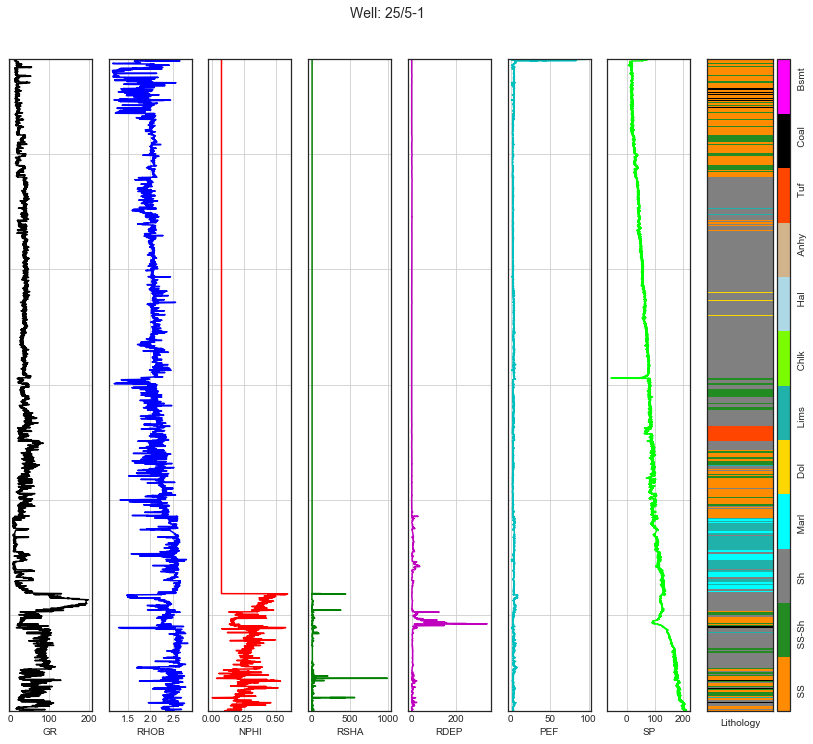

In [46]:
well_no=27
logs = pd.concat([X_imp, 
                  depth, 
                  Y], axis=1).rename(columns = {'FORCE_2020_LITHOFACIES_LITHOLOGY':'litho_real', 
                                                'DEPTH_MD':'Depth'})
make_facies_log_plot(logs[well==wells[well_no]], ['GR', 'RHOB', 'NPHI', 'RSHA', 
                                                  'RDEP', 'PEF', 'SP'], #, 'CALIBS'
                     wells[well_no],
                     facies_colors)

In [ ]:
Strat = data['GROUP']#.values #['WELL',]

from sklearn.preprocessing import LabelEncoder
labeler = LabelEncoder()
Strata = DataFrame(labeler.fit_transform(Strat.astype(str)), index=Strat.index)
Strata=Strata.where(Strat.notnull(), Strat, axis=0)
Strata=DataFrame(imp.fit_transform(Strata), index=Strat.index).round().astype(int)
Strata=Series(labeler.inverse_transform(Strata.values.ravel()), index=Strat.index)
np.unique(Strata)#.isnull().sum()

In [ ]:
display(well[Strata.isnull()].unique())
[i for i,v in enumerate(wells) if v in well[Strata.isnull()].unique()]

In [ ]:
well_no=23
well_data = X[well == wells[well_no]]
well_data_imp = X_imp[well == wells[well_no]]
well_data_dendimp = X_dend[well == wells[well_no]]
well_depth = depth[well == wells[well_no]]
well_facies = Y[well == wells[well_no]]
well_strat = Strat[well == wells[well_no]].factorize()[0].reshape(-1,1)
well_formation = Formation[well == wells[well_no]].factorize()[0].reshape(-1,1)

cmap_facies = ListedColormap(facies_colors, 'indexed')
cluster=np.repeat(well_facies.values.reshape(-1, 1),50,axis=1)
num_curves = len(well_data.columns)
fig, axs = plt.subplots(1, num_curves+1, figsize=(15, 11), sharey=True)
for ic, col in enumerate(well_data.columns):
    axs[ic].plot(well_data_dendimp[col], well_depth, 'green')#, '.'
    axs[ic].plot(well_data_imp[col], well_depth, 'red')#, '.'
    axs[ic].plot(well_data[col], well_depth, 'orange')
    axs[ic].set_xlabel(col)
    axs[ic].grid()

ic=num_curves    
im=axs[ic].imshow(cluster, interpolation='none', aspect='auto', 
                  cmap=cmap_facies,vmin=0,vmax=len(Y.unique()))    
divider = make_axes_locatable(axs[ic])
cax = divider.append_axes("right", size="20%", pad='7%')
cbar=plt.colorbar(im, cax=cax)
#for index, label in enumerate(list(facies_names)):
#        cbar.ax.text(2, index+.5, '  ' + label, ha='left', va='center', rotation=270)
cbar.set_label((11*' ').join(['  SS', 'SS-Sh', 'Sh', 
                              ' Marl', 'Dol', 'Lims', 'Chlk ', 
                              '  Hal', 'Anhy', 'Turf', 'Coal', 'Bsmt']))
cbar.set_ticks(list())
cbar.set_ticklabels('')
axs[ic].set_xlabel('LithoFacies')
axs[ic].set_xticklabels([])

axs[0].set_ylim(well_depth.values[-1], well_depth.values[0])
fig.suptitle('Well: %s'% wells[well_no], fontsize=14,y=0.94)

In [ ]:
df_labels=Y
df_features = X_imp

from sklearn.ensemble import RandomForestClassifier
mod = RandomForestClassifier(n_estimators=50)
mod.fit(df_features, df_labels)
featimportance=mod.feature_importances_
# summarize feature importance
feature_importance = DataFrame(featimportance, index=df_features.columns, 
                               columns=['feature importance']).sort_values('feature importance', ascending=True)
# plot feature importance
feature_importance.plot(kind='barh', title='Plots Comparison for Feature Importance')

In [30]:
# Feature augmentation function
def augment_features(X, well, depth):
    
    # Augment features
    padded_rows = []
    X_aug = np.zeros((X.shape[0], X.shape[1]*2))
    for w in np.unique(well):
        w_idx = np.where(well == w)[0]  #index
        
        # Compute features gradient function
        d_diff = np.diff(depth[w_idx]).reshape((-1, 1)) #check difference in depth
        d_diff[d_diff==0] = 0.01                        #if difference in depth is zero, make it 0.01
        X_diff = np.diff(X.loc[w_idx, :], axis=0)           #check difference in features
        X_grad = X_diff / d_diff                        #calculate gradient by dividing features by depth 
        
        # Compensate for last rows - padding
        X_grad = np.concatenate((X_grad, np.zeros((1, X_grad.shape[1]))))
    
        X_aug[w_idx, :] = np.concatenate((X.loc[w_idx, :], X_grad), axis=1)
        
        # Find padded rows
        padded_rows.append(w_idx[-1])
            
    return X_aug, padded_rows

In [47]:
# Augment features
to_drop=['BS', 'DTC', 'RMED']#, 'CALI', 'CALIBS'
X_imp1=X_imp.drop(to_drop, axis=1)
X_aug, padded_rows = augment_features(X_imp1, well, depth)
col=list(X_imp1.columns.values)
col= col + ['Delta' + sub for sub in col]
X_aug = DataFrame(X_aug, index=X_imp.index, columns=col)
len(padded_rows)
X_aug.shape

(1170511, 16)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Add higher degree terms and interaction terms to the model
deg = 2
poly = PolynomialFeatures(deg, interaction_only=False)
X_aug2 = poly.fit_transform(X_aug)
X_aug2 = X_aug2[:,1:]
X_aug2.shape

### Applying the custom scoring function

Apart from the missing log curves, **one of the key challenges of this machine learning competition is that you are being scored using a custom scoring function**. 

A prediction is scored using the penalty function
$$ S = - \frac{1}{N}\sum_{i=0}^N A_{ \hat{y}_i y_i} $$
where $N$ is the number of samples, $y_i$ is prediction for sample $i$, $\hat{y}_i$ is the true target for sample $i$, and $A$ is the penalty matrix given by the following

In short, the value of the matrix A at row i and column j is the **penalty** given by guessing lithology number i when the correct label is lithology numner j. Notice that the diagonal consists of zeros, no penalty is given for correct predictions.

In [32]:
A = np.load('D:/.jupyter/Machine_Predicted_Lithology/penalty_matrix.npy')

The scoring function can be implemented as follows. If used as a loss function in a neural network framwork, it is recommended to implement a more efficient function based on tensor products. 

In [33]:
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

**IMPORTANT: The implementation above assumes zero-indexed y_true and y_pred. Be careful not to mix zero-indexed and 1-indexed class labels.**

#### Select only the columns you want to use

In [48]:
X_nopad = X_aug[~X_aug.index.isin(padded_rows)]
Y_nopad = Y[~Y.index.isin(padded_rows)]
# Remove a single well to use as a blind test later
X_blind = X_nopad[well == '7/1-2 S']
Y_blind = Y_nopad[well == '7/1-2 S']

X_nopad = X_nopad[well != '7/1-2 S']
Y_nopad = Y_nopad[well != '7/1-2 S']
X_blind.shape

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


(2039, 16)

##### Shuffle the data

In [49]:
X_s, Y_s = DataFrame([]), DataFrame([])
for w in wells:
    Xsh, Ysh = shuffle(X_nopad[well == w], Y_nopad[well == w], random_state=seed_value)
    X_s = pd.concat([X_s, Xsh], axis=0, sort=False)
    Y_s = pd.concat([Y_s, Ysh], axis=0, sort=False)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


##### Scale the features

In [50]:
scaler = StandardScaler()
#scaler = RobustScaler(quantile_range=(25.0, 75.0))

In [51]:
X_s = DataFrame(scaler.fit_transform(X_s), index=X_s.index, columns=X_s.columns)

##### Split into train and test data

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_s, Y_s, test_size=0.1, random_state=seed_value)
dw=data_weights[Y_train.index].values
Y_train=Y_train.to_numpy().ravel()
X_train=X_train.to_numpy()
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(Y_train), class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(Y_train), 
                                                  y=Y_train)))

In [ ]:
import lightgbm as lgbm
from sklearn.metrics import fbeta_score, make_scorer
# Train classifier
grid = {'learning_rate': [0.05, 0.1, 0.15, 0.2], 
        'num_iterations': [200, 300, 400, 500], 
        'bagging_fraction': [0.7, 0.8, 0.9, 1], 
        'feature_fraction': [0.3, 0.4, 0.5, 0.6], 
        'num_leaves': [6, 15, 40, 120],
        'reg_alpha': [0.2, 0.5, 1, 1.2], 
        'subsample' : [0.7, 0.75, 0.9],
        'colsample_bytree' : [0.5, 0.65, 0.8, 0.9],
        'max_depth': [5, 10, 15, 20]}

modelgbm = OneVsOneClassifier(lgbm.LGBMClassifier(class_weight= 'balanced', random_state=seed_value, 
                                                  objective='multiclass'))
model = RandomizedSearchCV(estimator=modelgbm, param_distributions=grid, 
                        scoring=make_scorer(score, greater_is_better=False), n_iter=250, 
                        cv=KFold(n_splits=5, shuffle=True, random_state=seed_value), 
                        random_state=seed_value, n_jobs=5, verbose=5)
model.fit(X_train, Y_train)
#modelgbm = OneVsOneClassifier(lgbm.LGBMClassifier(n_estimators=200, #learning_rate=0.05, max_depth=10,
#                               min_child_weight=5, min_child_samples=20, class_weight= 'balanced',
#                               random_state=seed_value, #subsample=0.9, reg_alpha=0.5, colsample_bytree=0.9
                                                 ))

In [83]:
import lightgbm as lgbm
modelgbm = OneVsOneClassifier(lgbm.LGBMClassifier(n_estimators=500, learning_rate=0.005, class_weight= 'balanced', 
                                                  random_state=seed_value))
modelgbm.fit(X_train, Y_train)#, sample_weight=dw

OneVsOneClassifier(estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight='balanced',
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.005, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=500, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=42, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                                            subsample=1.0,
                                            subsample_for_bin=200000,
                           

In [ ]:
# Best params from GradientBoostingClassifier's optimization
param = {'MED': 1, 'S': 25, 'R': 0.1, 'Sub': 1, 'Loss': 'exponential', 'M': 10, 'L': 5, 'N': 100}

# Train classifier
modelgbc = OneVsOneClassifier(GradientBoostingClassifier(loss=param['Loss'], n_estimators=param['N'],
                                                      learning_rate=param['R'], max_features=param['M'],
                                                      min_samples_leaf=param['L'], min_samples_split=param['S'],
                                                      random_state=seed_value, subsample=param['Sub'],
                                                      max_leaf_nodes=None, verbose=0))

In [ ]:
# XGBoost
modelxgb = xgb.XGBClassifier(n_estimators=200, max_depth=3, gamma=0.5, reg_alpha=0.5,
                             learning_rate=0.05, min_child_weight=10, subsample=0.9, #class_weight= class_weights,
                             colsample_bytree=0.9, seed=seed_value)

In [ ]:
modelxgb.fit(X_train, Y_train, sample_weight=dw)

In [ ]:
# RFC
param = {'S': 25, 'M': 10, 'L': 5, 'N': 100}
modelrfc = OneVsOneClassifier(RandomForestClassifier(n_estimators=param['N'], criterion='entropy',
                                                     max_features=param['M'], min_samples_split=param['S'], 
                                                     min_samples_leaf=param['L'],
                                                     class_weight='balanced', random_state=seed_value))

In [ ]:
# SVC
modelsvc = SVC(kernel='rbf', C=100, gamma=1)

In [ ]:
#modelgbc.fit(X_train, Y_train)
modelsvc.fit(X_train, Y_train)

In [ ]:
modelrfc.fit(X_train, Y_train)

#### Test model

In [84]:
model=modelgbm

In [ ]:
Y_pred = model.predict(X_test.to_numpy())

In [ ]:
score(Y_test.values, Y_pred)

In [80]:
conf_mat=confusion_matrix(Y_test.values, Y_pred)
facies_labels = ['SS', 'SS-Sh', 'Sh', ' Marl', 'Dol', 'Lims', 'Chlk ', 'Hal', 'Anhy', 'Tuf', 'Coal', 'Bsmt']
display_cm(conf_mat, facies_labels, display_metrics=True, hide_zeros=True)

     Pred    SS SS-Sh    Sh  Marl   Dol  Lims Chlk    Hal  Anhy   Tuf  Coal  Bsmt Total
     True
       SS 12656  1542   772   408   124   757    28           2   296   317     1 16903
    SS-Sh  1515 10155  1724   433   195   391     3               323   194     5 14938
       Sh  1215  6630 52771  2896  1824  1417    11    24     2  3999  1113     5 71907
     Marl    48    62   160  2630    29   335    31                49    12        3356
      Dol     3     3     9     2   146     7                 2     5               177
     Lims   181   232   378   427   148  3910   212           9   121    40        5658
    Chlk                        2     1    29  1009           1     2              1044
      Hal     1                                       822     8           2         833
     Anhy                       2     2     2           3   115                     124
      Tuf     8     3    52    22    20    12                    1376     4        1497
     Coal    15     7 

In [73]:
X_blind = DataFrame(scaler.transform(X_blind), index=X_blind.index, columns=X_blind.columns)
Y_blind_pred = model.predict(X_blind.to_numpy())
score(Y_blind.values, Y_blind_pred)

-0.9838155958803335

In [81]:
conf_mat=confusion_matrix(Y_blind.values, Y_blind_pred)
facies_labels_blind = [facies_labels[np.sort(Y_blind.unique())[i]] for i in np.sort(Y_blind.unique()) ]
display_cm(conf_mat, facies_labels_blind, display_metrics=True, hide_zeros=True)

     Pred    SS SS-Sh    Sh Total
     True
       SS  1375              1375
    SS-Sh   212               212
       Sh   452               452

Precision  0.67  0.00  0.00  0.45
   Recall  1.00  0.00  0.00  0.67
       F1  0.81  0.00  0.00  0.54


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in true_divide


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: UserWarning: Attempting to set identical left == right == -0.6211256839190359 results in singular transformations; automatically expanding.


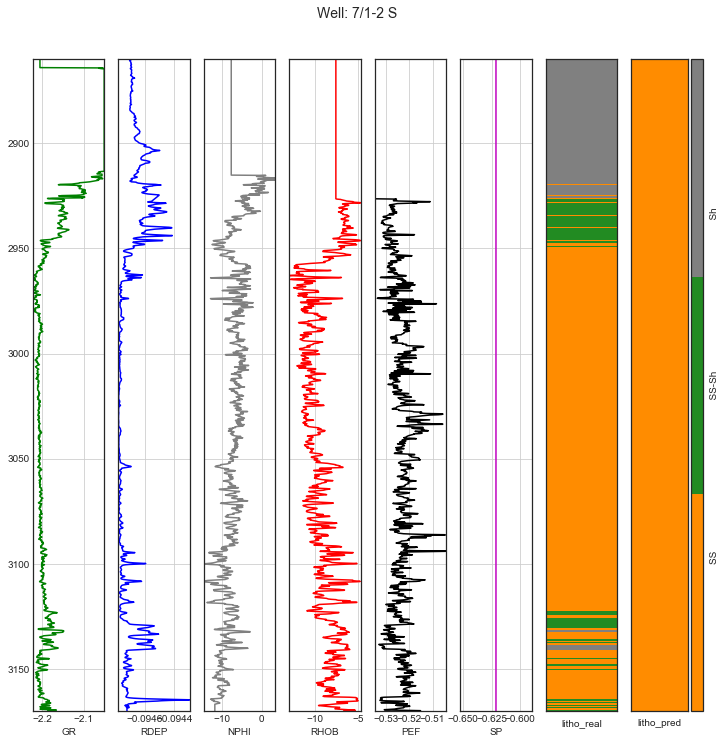

In [82]:
logs = pd.concat([X_blind.iloc[:,:len(X_imp1.columns)], depth[well =='7/1-2 S'], 
                  Y_blind], axis=1).rename(columns = {'FORCE_2020_LITHOFACIES_LITHOLOGY':'litho_real', 'DEPTH_MD':'Depth'})
logs = pd.concat([logs, Series(Y_blind_pred, index=Y_blind.index)], axis=1).rename(columns = {0:'litho_pred'})
facies_colors_blind = [facies_colors[int(np.unique(Y_blind)[i])] for i in range(np.unique(Y_blind).shape[0])]
compare_facies_plot(logs, '7/1-2 S', ['SS', 'SS-Sh', 'Sh'], facies_colors_blind, int(np.unique(Y_blind).max()))

##### Example submission: weekly leaderboard
For the weekly leaderboard that will start September 1st, you are asked to submit predictions on the supplied open dataset in the file `test.csv`. This file contains all the columns that are in the training data except LITHOLOGY and LITHOLOGY_CONFIDENCE. Notice that the test data will also have missing columns. It is therefore important that your inference pipeline has the treatment of these missing columns as part of the pre-processing step.

In [ ]:
data_test = pd.read_csv('D:/.jupyter/Machine_Predicted_Lithology/test.csv', sep=';')

In [ ]:
# Store well labels and depths
well_test = data_test['WELL']
depth_test = data_test['DEPTH_MD']#.values #['WELL',]
Strat_test = data_test['GROUP']#.values #['WELL',]
Formation_test = data_test['FORMATION']
data_test.info()

In [ ]:
feature_testdata=data_test[feature_names]
feature_testdata['RSHA'] = np.log10(feature_testdata['RSHA'])
feature_testdata['RMED'] = np.log10(feature_testdata['RMED'])
feature_testdata['RDEP'] = np.log10(feature_testdata['RDEP'])
feature_testdata.describe()#isna().sum()

In [ ]:
feature_test = apply_filter(DataFrame(imp.transform(feature_testdata), 
                                      index=feature_testdata.index, columns=feature_testdata.columns))
feature_test=feature_testdata.where(feature_testdata.notnull(), feature_test, axis=0)
feature_test['CALIBS']=feature_test['CALI']-feature_test['BS']

In [ ]:
# Augment features
feature_test2=feature_test.drop(to_drop, axis=1)
feature_test_aug, padded_rows_test = augment_features(feature_test2, well_test, depth_test)
col=list(feature_test2.columns.values)
col= col + ['Delta' + sub for sub in col]
feature_test_aug = DataFrame(feature_test_aug, index=feature_test.index, columns=col)
len(padded_rows_test)
feature_test_aug.shape

In [ ]:
feature_test_aug = DataFrame(scaler.transform(feature_test_aug), 
                             index=feature_test_aug.index, columns=feature_test_aug.columns)
test_prediction = model.predict(feature_test_aug)

In [ ]:
test_prediction

In [ ]:
np.unique(well_test)

In [ ]:
w='35/9-8'
logs = pd.concat([feature_test, depth_test, 
                  DataFrame(test_prediction)], axis=1).rename(columns = {0:'litho_real', 'DEPTH_MD':'Depth'})
make_facies_log_plot(logs[well_test==w], ['GR', 'RHOB', 'NPHI', 'RDEP', 'DTC', 'PEF', 'SP'], w,
                     facies_colors)

**Important:** Before submitting we must map these predictions back to the lithology labels

In [ ]:
category_to_lithology = {y:x for x,y in lithology_numbers.items()}

In [ ]:
test_prediction_for_submission = np.vectorize(category_to_lithology.get)(test_prediction)

In [ ]:
test_prediction_for_submission

In [ ]:
np.savetxt('test_predictions.csv', test_prediction_for_submission, header='lithology', comments='', fmt='%i')

### Submitting code for final scoring
At the end of the competition, the highest performing teams are invited to submit code for blind scoring on a hidden test dataset. The winner will be the team with the best score on the hidden test dataset, not the weekly leaderboard. In order to do this, you must submit the following in a zip-file:
* Code to do the inference
* Any persisted data in the form of pre-trained model or models, scalers, and more
* Information about your environment

There are many ways of doing this. In the example above, the code to do the inference would be the `Model` class in a python-file, the persisted data would be the files `model.pkl` and `scaler.pkl`. 

Your python environment needs to be replicable by the judges of the competition. There are many ways of doing this. Examples include dumping pip package versions to a file

In [ ]:
!pip freeze > requirements.txt

If you are using Anaconda, then you can export an envionment file as follows

In [ ]:
!conda env export > environment.yml

Other options include `Docker`, `pipenv` and many more.